In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import logging
import pandas as pd
from IPython.display import clear_output
from tqdm import tqdm
from CompressionLibrary.utils import load_dataset, make_env, evaluate_adadeep, play_and_record_adadeep
from CompressionLibrary.CompressionTechniques import *
from CompressionLibrary.replay_buffer import ReplayBuffer
from CompressionLibrary.environments import *
from CompressionLibrary.custom_layers import ROIEmbedding, ROIEmbedding1D
from CompressionLibrary.reinforcement_models import DQNAgent
import sys
import gc
from datetime import datetime
from uuid import uuid4

/home/A00806415/anaconda3/envs/mc/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_data(data, title, bottom, top):
    plt.title(title)
    plt.grid()
    plt.ylim(bottom, top)
    plt.plot(data)
    plt.show()


def plot_multi_data(data1, data2, title, bottom, top, legends):
    plt.title(title)
    plt.grid()
    plt.ylim(bottom, top)
    plt.plot(data1)
    plt.plot(data2)
    plt.legend(legends)
    plt.show()


# MNIST mode of 256 EPSYLON 0.5

mnist: 1.8202834568111748 acc: 0.9809999883174896 w: 88825.2 14.388795474646942


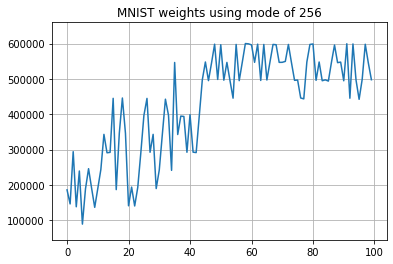

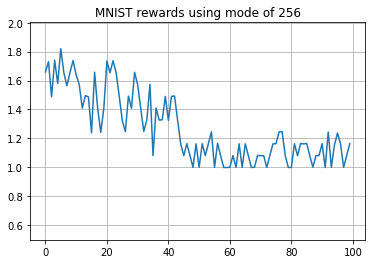

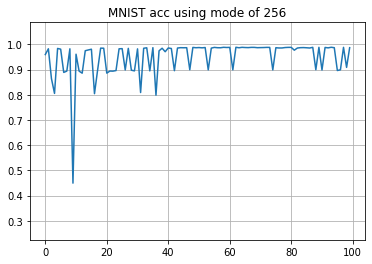

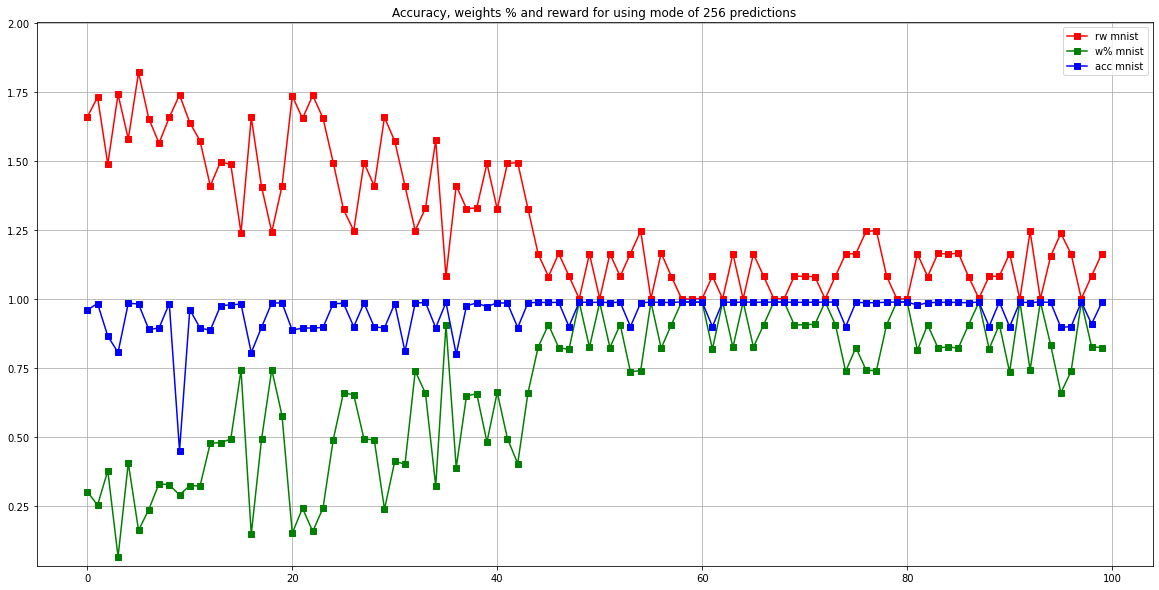

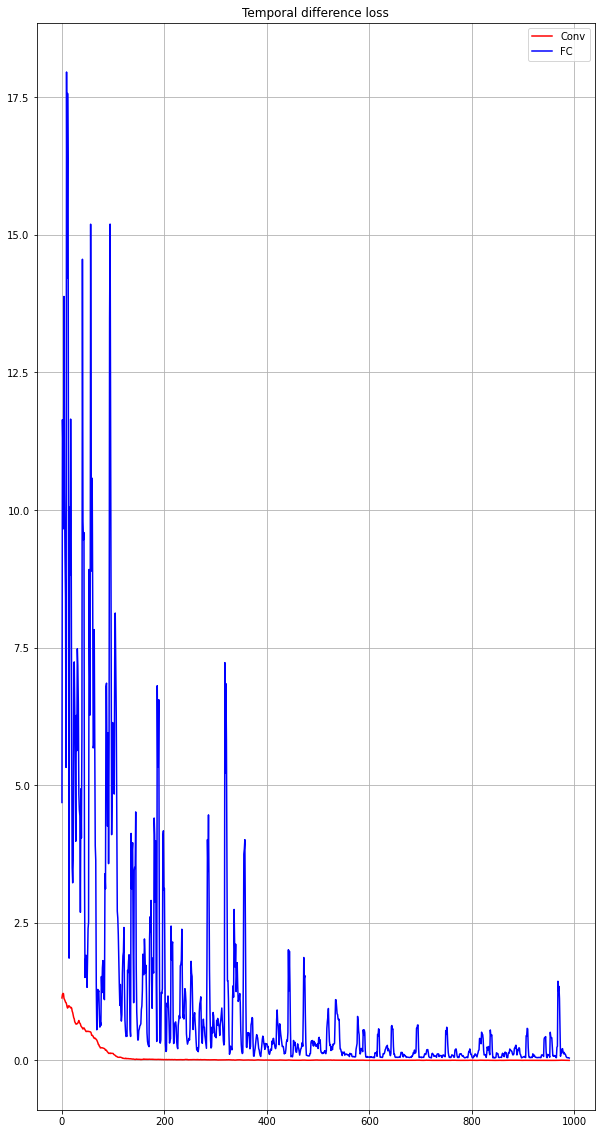

In [3]:
weights = np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_weights_history_10_mode_256.npy')
acc =  np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_acc_history_10_mode_256.npy')
rewards =  np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_rw_history_10_mode_256.npy')
td_conv_loss = np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_td_loss_conv_10_mode_256.npy')
td_fc_loss = np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_td_loss_fc_10_mode_256.npy')

mnist256 = np.argmax(rewards)

print('mnist:', np.max(rewards), 'acc:', acc[mnist256] ,'w:', weights[mnist256], 100*weights[mnist256]/617322 )


max_y = np.max(weights)*1.1
min_y = np.min(weights)*0.5
plot_data(weights, 'MNIST weights using mode of 256', min_y, max_y)

max_y = np.max(rewards)*1.1
min_y = np.min(rewards)*0.5

plot_data(rewards, 'MNIST rewards using mode of 256', min_y, max_y)

max_y = np.max(acc)*1.1
min_y = np.min(acc)*0.5

plot_data(acc, 'MNIST acc using mode of 256', min_y, max_y)

wp = rewards - acc
wp = np.abs(1 - wp) 
max_y = np.max(rewards)*1.1
min_y = np.min(wp)*0.5

plt.figure(figsize=(20,10))
plt.title('Accuracy, weights % and reward for using mode of 256 predictions')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards, c='r', marker='s')
plt.plot(wp, c='g', marker='s')
plt.plot(acc, c='b', marker='s')
plt.legend(['rw mnist','w% mnist', 'acc mnist'])
plt.show()

plt.figure(figsize=(10,20))
plt.title('Temporal difference loss')
plt.grid()
plt.plot(td_conv_loss, c='r')
plt.plot(td_fc_loss, c='b')
plt.legend(['Conv','FC'])
plt.show()

# Fashion MNIST EPSYLON 0.9, 10000 EPOCHS

mnist: 1.74987954054309 acc: 0.904791671037674 w: 86177.2 13.959845915097793


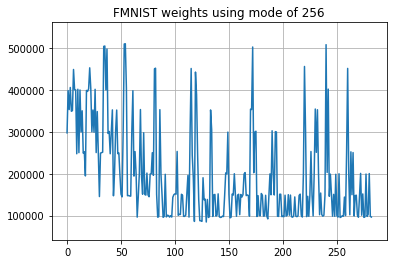

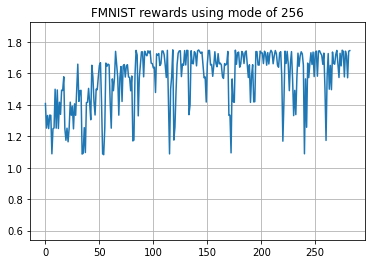

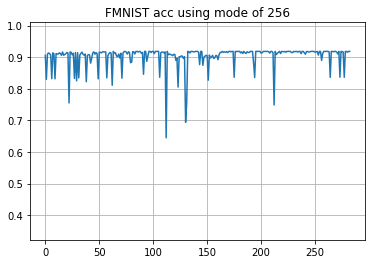

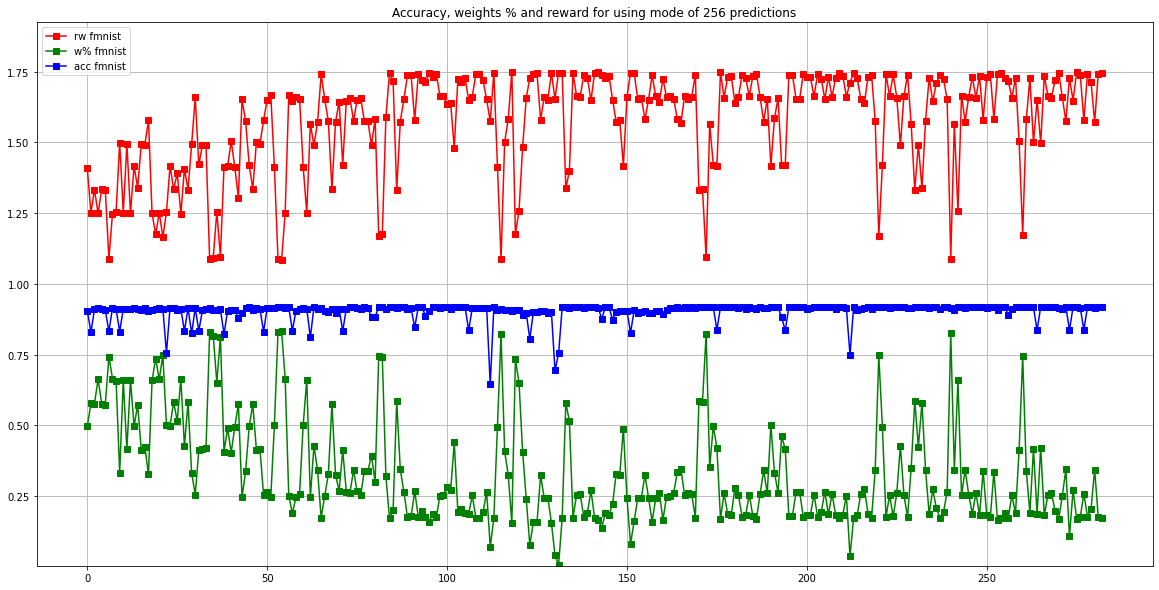

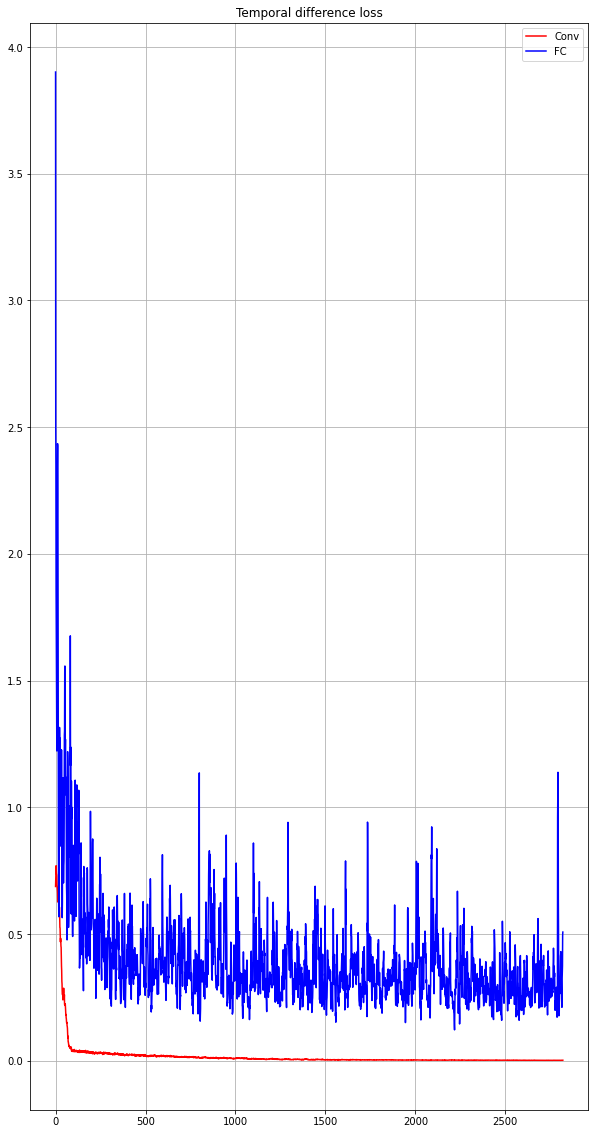

In [4]:
path = './data/numpy results/fashion_mnist_2022-06-17-14-3445-763a3878-20b7-454e-85d8-0817d9e4382a'
weights = np.load(path + '_weights_history_10_mode_256.npy')
acc =  np.load(path + '_acc_history_10_mode_256.npy')
rewards =  np.load(path + '_rw_history_10_mode_256.npy')
td_conv_loss = np.load(path + '_td_loss_conv_10_mode_256.npy')
td_fc_loss = np.load(path + '_td_loss_fc_10_mode_256.npy')

mnist256 = np.argmax(rewards)

print('mnist:', np.max(rewards), 'acc:', acc[mnist256] ,'w:', weights[mnist256], 100*weights[mnist256]/617322 )


max_y = np.max(weights)*1.1
min_y = np.min(weights)*0.5
plot_data(weights, 'FMNIST weights using mode of 256', min_y, max_y)

max_y = np.max(rewards)*1.1
min_y = np.min(rewards)*0.5

plot_data(rewards, 'FMNIST rewards using mode of 256', min_y, max_y)

max_y = np.max(acc)*1.1
min_y = np.min(acc)*0.5

plot_data(acc, 'FMNIST acc using mode of 256', min_y, max_y)

wp = rewards - acc
wp = np.abs(1 - wp) 
max_y = np.max(rewards)*1.1
min_y = np.min(wp)*0.5

plt.figure(figsize=(20,10))
plt.title('Accuracy, weights % and reward for using mode of 256 predictions')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards, c='r', marker='s')
plt.plot(wp, c='g', marker='s')
plt.plot(acc, c='b', marker='s')
plt.legend(['rw fmnist','w% fmnist', 'acc fmnist'])
plt.show()

plt.figure(figsize=(10,20))
plt.title('Temporal difference loss')
plt.grid()
plt.plot(td_conv_loss, c='r')
plt.plot(td_fc_loss, c='b')
plt.legend(['Conv','FC'])
plt.show()

# MNIST & Fashion MNIST EPSYLON 0.9, 10000 EPOCHS

mnist: 1.7360946312802354 acc: 0.9830083310604095 w: 142851.7 23.140549016558623
fmnist: 1.6575086111136013 acc: 0.8987999856472015 w: 143938.9 64.1240551932379


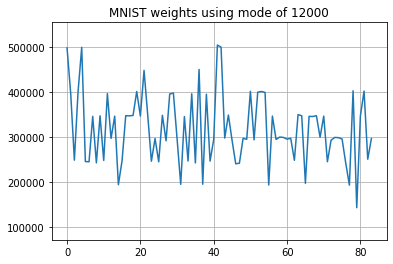

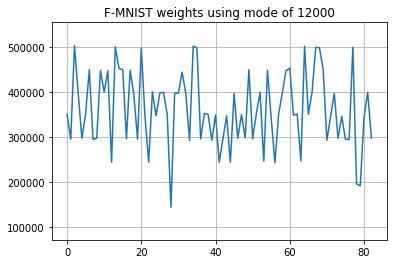

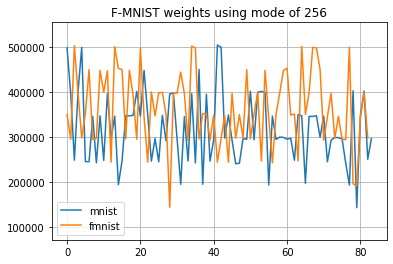

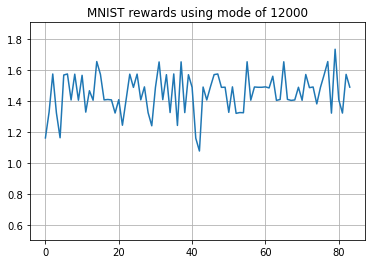

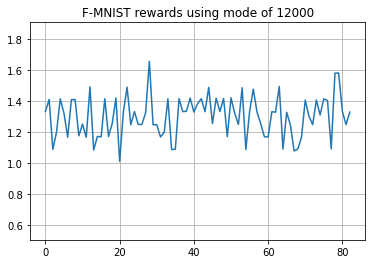

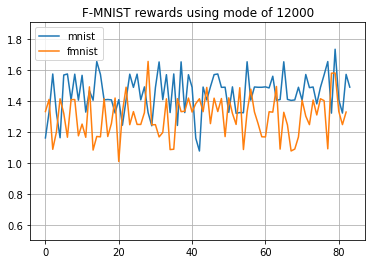

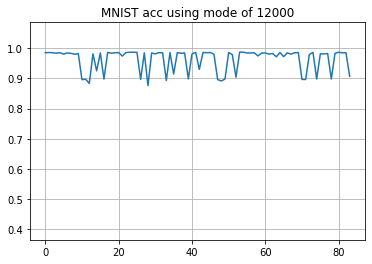

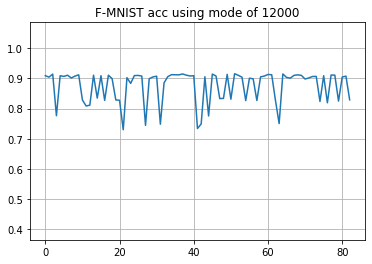

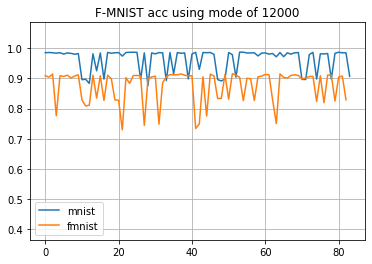

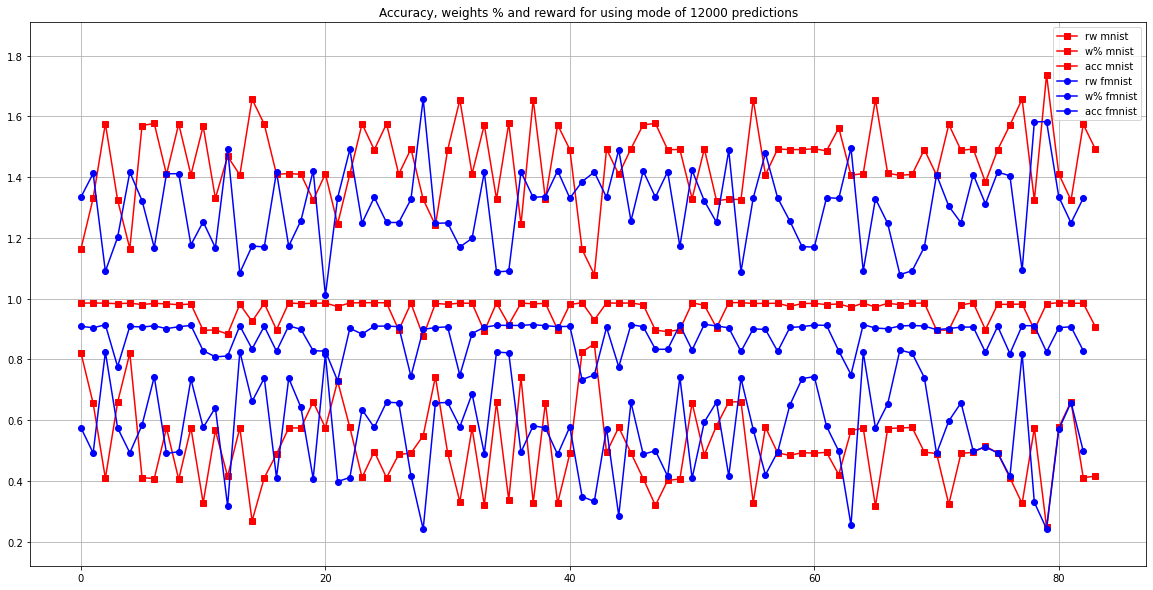

In [14]:
path = './data/numpy results/fashion_mnist_2022-06-28-16-2139-4bbd88bf-364c-457f-85cc-b6a19e5c1da3'

weights = np.load(path + '_weights_history_10_mode_12000.npy')
acc =  np.load(path + '_acc_history_10_mode_12000.npy')
rewards =  np.load(path + '_rw_history_10_mode_12000.npy')
td_conv_loss = np.load(path + '_td_loss_conv_10_mode_12000.npy')
td_fc_loss = np.load(path + '_td_loss_fc_10_mode_12000.npy')

weights_mnist = weights[0::2]
weights_fmnist = weights[1::2]
rewards_mnist = rewards[0::2]
rewards_fmnist = rewards[1::2]
acc_mnist = acc[0::2]
acc_fmnist = acc[1::2]

wp = rewards - acc
wp = np.abs(1 - wp) 
wp_mnist = wp[0::2]
wp_fmnist = wp[1::2]

mnist = np.argmax(rewards_mnist)
fmnist = np.argmax(rewards_fmnist)

print('mnist:', np.max(rewards_mnist), 'acc:', acc_mnist[mnist] ,'w:', weights_mnist[mnist], 100*weights_mnist[mnist]/617322 )
print('fmnist:', np.max(rewards_fmnist), 'acc:', acc_fmnist[fmnist] ,'w:', weights_fmnist[fmnist], 100*weights_mnist[fmnist]/617322 )

max_y = np.max(weights)*1.1
min_y = np.min(weights)*0.5
plot_data(weights_mnist, 'MNIST weights using mode of 12000', min_y, max_y)
plot_data(weights_fmnist, 'F-MNIST weights using mode of 12000', min_y, max_y)

plot_multi_data(weights_mnist,weights_fmnist, 'F-MNIST weights using mode of 256', min_y, max_y, ['mnist', 'fmnist'])



max_y = np.max(rewards)*1.1
min_y = np.min(rewards)*0.5

plot_data(rewards_mnist, 'MNIST rewards using mode of 12000', min_y, max_y)
plot_data(rewards_fmnist, 'F-MNIST rewards using mode of 12000', min_y, max_y)
plot_multi_data(rewards_mnist,rewards_fmnist, 'F-MNIST rewards using mode of 12000', min_y, max_y, ['mnist', 'fmnist'])



max_y = np.max(acc)*1.1
min_y = np.min(acc)*0.5

plot_data(acc_mnist, 'MNIST acc using mode of 12000', min_y, max_y)
plot_data(acc_fmnist, 'F-MNIST acc using mode of 12000', min_y, max_y)
plot_multi_data(acc_mnist,acc_fmnist, 'F-MNIST acc using mode of 12000', min_y, max_y, ['mnist', 'fmnist'])



max_y = np.max(rewards)*1.1
min_y = np.min(wp)*0.5

plt.figure(figsize=(20,10))
plt.title('Accuracy, weights % and reward for using mode of 12000 predictions')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards_mnist, c='r', marker='s')
plt.plot(wp_mnist, c='g', marker='s')
plt.plot(acc_mnist, c='b', marker='s')
plt.plot(rewards_fmnist, c='r', marker='o')
plt.plot(wp_fmnist, c='g', marker='o')
plt.plot(acc_fmnist, c='b', marker='o')
plt.legend(['rw mnist','w% mnist', 'acc mnist', 'rw fmnist','w% fmnist', 'acc fmnist'])
plt.show()


# Fashion MNIST mode of 256

fmnist: 1.7457288124343282 acc: 0.9025250017642975 w: 95512.4 15.47205510252348


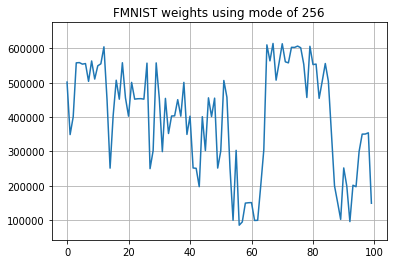

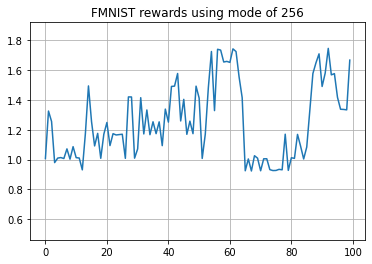

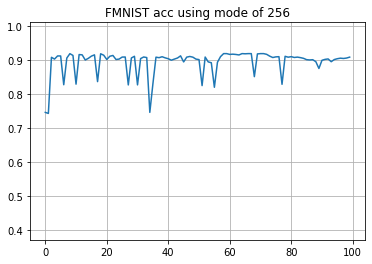

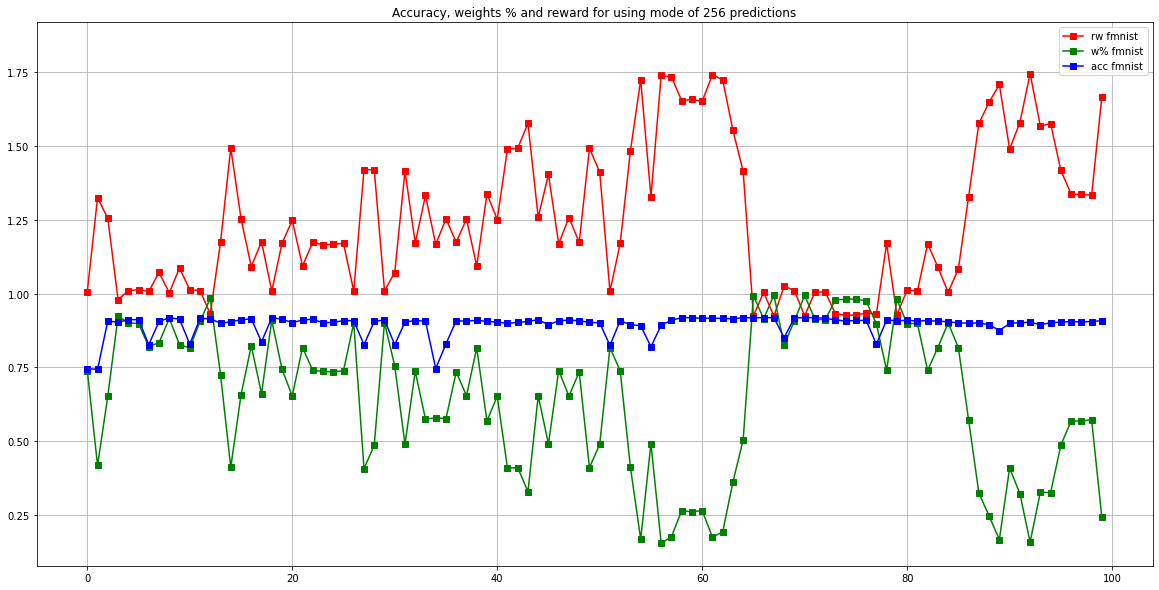

In [ ]:
weights = np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_weights_history_10_mode_256.npy')
acc =  np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_acc_history_10_mode_256.npy')
rewards =  np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_rw_history_10_mode_256.npy')
td_conv_loss = np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_td_loss_conv_10_mode_256.npy')
td_fc_loss = np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_td_loss_fc_10_mode_256.npy')

mnist256 = np.argmax(rewards)

print('fmnist:', np.max(rewards), 'acc:', acc[mnist256] ,'w:', weights[mnist256], 100*weights[mnist256]/617322 )


max_y = np.max(weights)*1.1
min_y = np.min(weights)*0.5
plot_data(weights, 'FMNIST weights using mode of 256', min_y, max_y)

max_y = np.max(rewards)*1.1
min_y = np.min(rewards)*0.5

plot_data(rewards, 'FMNIST rewards using mode of 256', min_y, max_y)

max_y = np.max(acc)*1.1
min_y = np.min(acc)*0.5

plot_data(acc, 'FMNIST acc using mode of 256', min_y, max_y)

wp = rewards - acc
wp = np.abs(1 - wp) 
max_y = np.max(rewards)*1.1
min_y = np.min(wp)*0.5

plt.figure(figsize=(20,10))
plt.title('Accuracy, weights % and reward for using mode of 256 predictions')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards, c='r', marker='s')
plt.plot(wp, c='g', marker='s')
plt.plot(acc, c='b', marker='s')
plt.legend(['rw fmnist','w% fmnist', 'acc fmnist'])
plt.show()

# Fashion MNIST & MNIST mode of 256

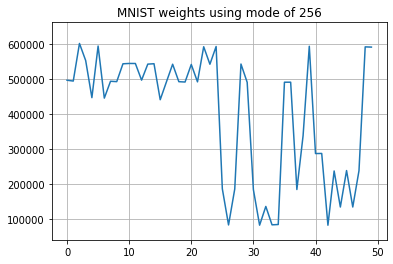

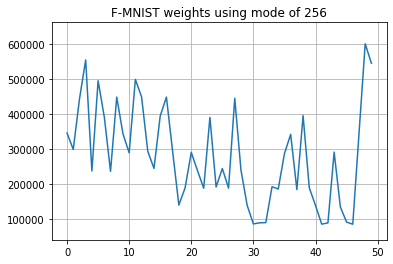

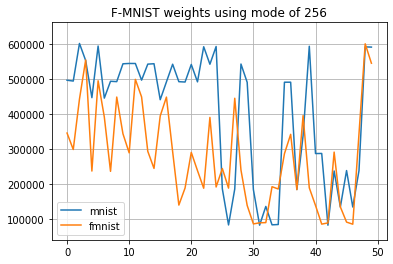

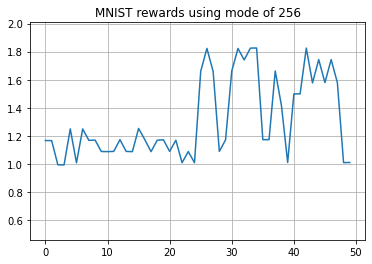

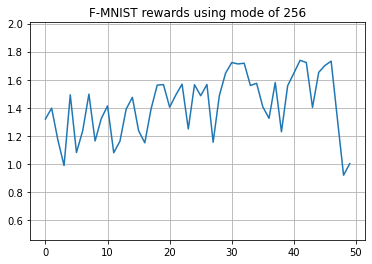

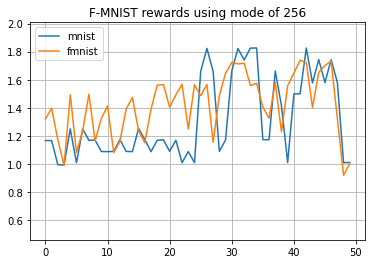

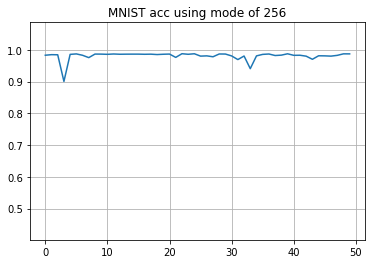

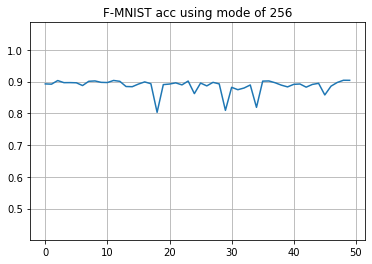

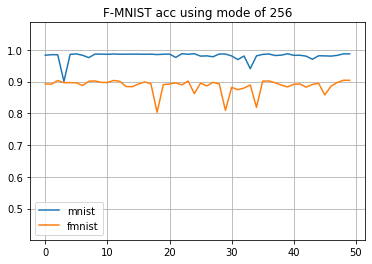

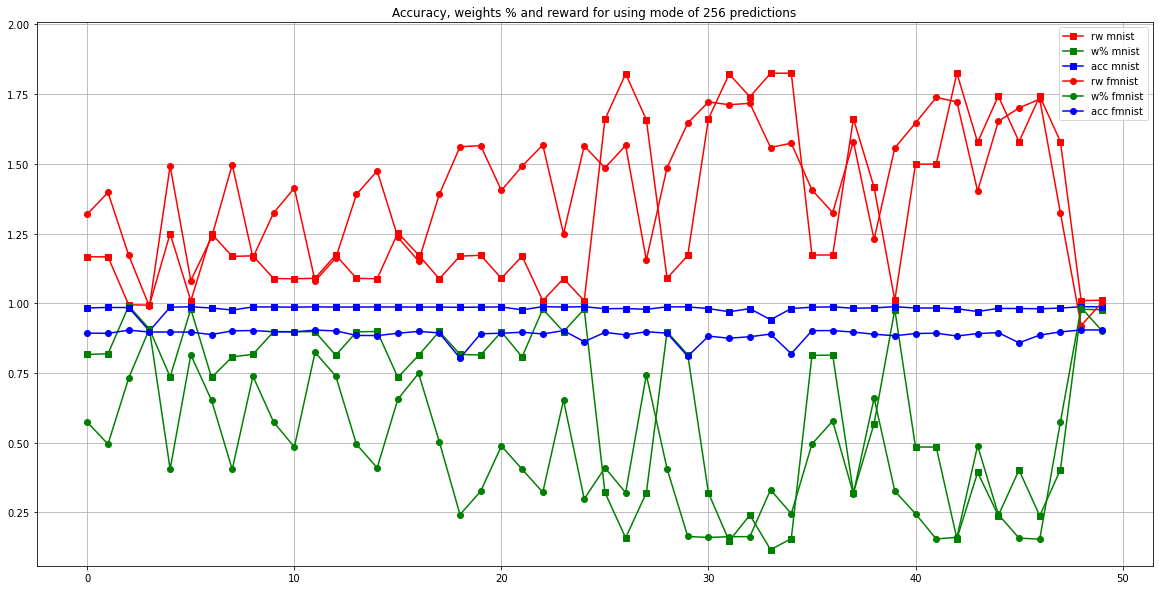

In [ ]:
weights = np.load('./data/numpy results/fashion_mnist_2022-05-20-17-2054-3990db70-7c26-44b8-91bb-ea1286161fc8_weights_history_10_mode_256.npy')
acc =  np.load('./data/numpy results/fashion_mnist_2022-05-20-17-2054-3990db70-7c26-44b8-91bb-ea1286161fc8_acc_history_10_mode_256.npy')
rewards =  np.load('./data/numpy results/fashion_mnist_2022-05-20-17-2054-3990db70-7c26-44b8-91bb-ea1286161fc8_rw_history_10_mode_256.npy')
weights_mnist = weights[0::2]
weights_fmnist = weights[1::2]

max_y = np.max(weights)*1.1
min_y = np.min(weights)*0.5
plot_data(weights_mnist, 'MNIST weights using mode of 256', min_y, max_y)
plot_data(weights_fmnist, 'F-MNIST weights using mode of 256', min_y, max_y)

plot_multi_data(weights_mnist,weights_fmnist, 'F-MNIST weights using mode of 256', min_y, max_y, ['mnist', 'fmnist'])

rewards_mnist = rewards[0::2]
rewards_fmnist = rewards[1::2]

max_y = np.max(rewards)*1.1
min_y = np.min(rewards)*0.5

plot_data(rewards_mnist, 'MNIST rewards using mode of 256', min_y, max_y)
plot_data(rewards_fmnist, 'F-MNIST rewards using mode of 256', min_y, max_y)
plot_multi_data(rewards_mnist,rewards_fmnist, 'F-MNIST rewards using mode of 256', min_y, max_y, ['mnist', 'fmnist'])

acc_mnist = acc[0::2]
acc_fmnist = acc[1::2]

max_y = np.max(acc)*1.1
min_y = np.min(acc)*0.5

plot_data(acc_mnist, 'MNIST acc using mode of 256', min_y, max_y)
plot_data(acc_fmnist, 'F-MNIST acc using mode of 256', min_y, max_y)
plot_multi_data(acc_mnist,acc_fmnist, 'F-MNIST acc using mode of 256', min_y, max_y, ['mnist', 'fmnist'])

wp = rewards - acc
wp = np.abs(1 - wp) 
wp_mnist = wp[0::2]
wp_fmnist = wp[1::2]

max_y = np.max(rewards)*1.1
min_y = np.min(wp)*0.5

plt.figure(figsize=(20,10))
plt.title('Accuracy, weights % and reward for using mode of 256 predictions')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards_mnist, c='r', marker='s')
plt.plot(wp_mnist, c='g', marker='s')
plt.plot(acc_mnist, c='b', marker='s')
plt.plot(rewards_fmnist, c='r', marker='o')
plt.plot(wp_fmnist, c='g', marker='o')
plt.plot(acc_fmnist, c='b', marker='o')
plt.legend(['rw mnist','w% mnist', 'acc mnist', 'rw fmnist','w% fmnist', 'acc fmnist'])
plt.show()


# Fashion MNIST & MNIST mode of 12000

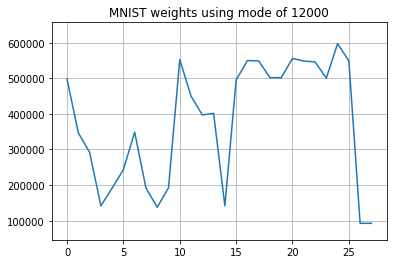

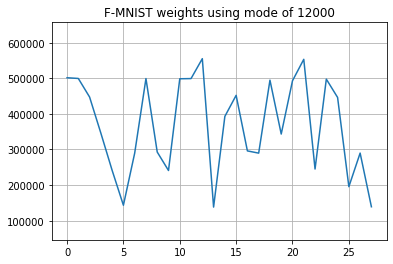

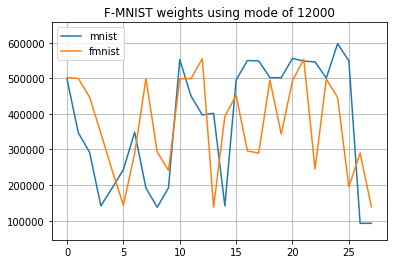

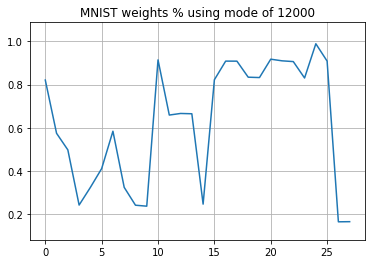

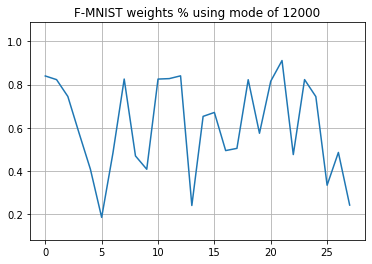

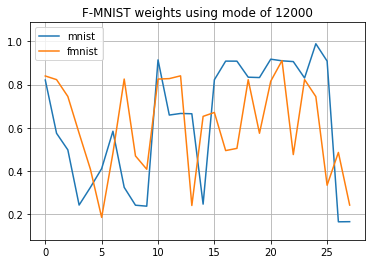

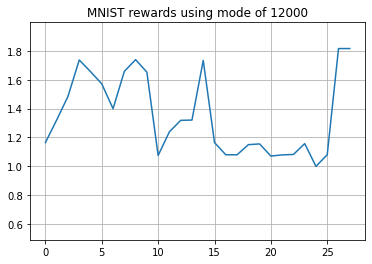

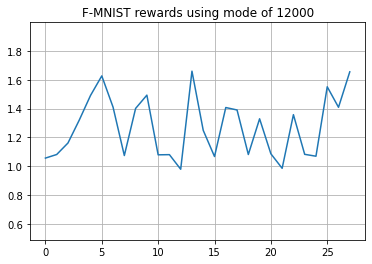

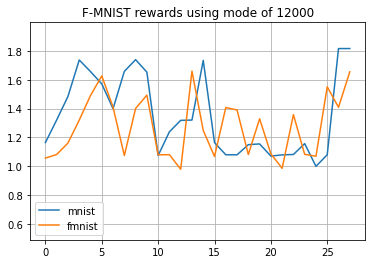

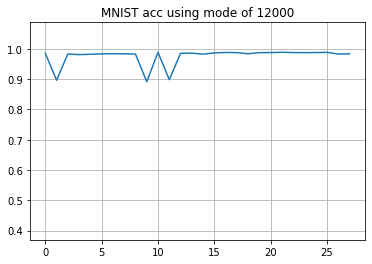

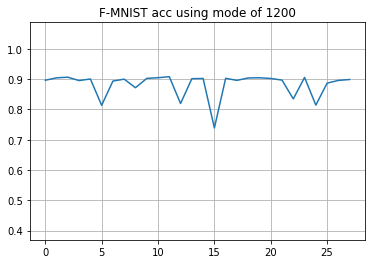

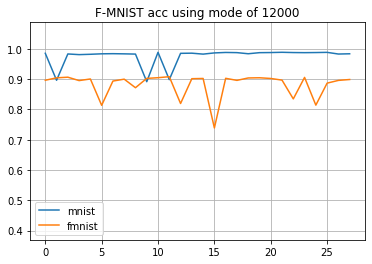

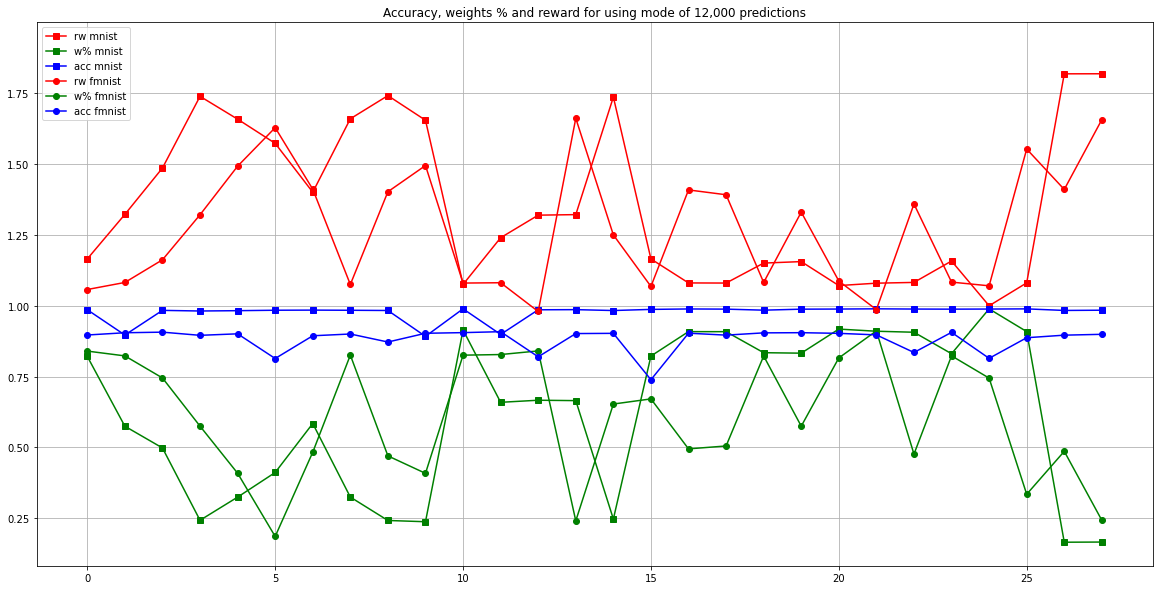

In [ ]:
weights = np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_weights_history_10_mode_12000.npy')
td_fc_loss = np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_td_loss_fc_10_mode_12000.npy')
td_conv_loss =  np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_td_loss_conv_10_mode_12000.npy')
acc =  np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_acc_history_10_mode_12000.npy')
rewards =  np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_rw_history_10_mode_12000.npy')
weights_mnist = weights[0::2]
weights_fmnist = weights[1::2]

max_y = np.max(weights)*1.1
min_y = np.min(weights)*0.5
plot_data(weights_mnist, 'MNIST weights using mode of 12000', min_y, max_y)
plot_data(weights_fmnist, 'F-MNIST weights using mode of 12000', min_y, max_y)

plot_multi_data(weights_mnist,weights_fmnist, 'F-MNIST weights using mode of 12000', min_y, max_y, ['mnist', 'fmnist'])

wp = rewards - acc
wp = 1 - wp 
wp_mnist = wp[0::2]
wp_fmnist = wp[1::2]

max_y = np.max(wp)*1.1
min_y = np.min(wp)*0.5

plot_data(wp_mnist, 'MNIST weights % using mode of 12000', min_y, max_y)
plot_data(wp_fmnist, 'F-MNIST weights % using mode of 12000', min_y, max_y)

plot_multi_data(wp_mnist,wp_fmnist, 'F-MNIST weights using mode of 12000', min_y, max_y, ['mnist', 'fmnist'])

rewards_mnist = rewards[0::2]
rewards_fmnist = rewards[1::2]

max_y = np.max(rewards)*1.1
min_y = np.min(rewards)*0.5

plot_data(rewards_mnist, 'MNIST rewards using mode of 12000', min_y, max_y)
plot_data(rewards_fmnist, 'F-MNIST rewards using mode of 12000', min_y, max_y)
plot_multi_data(rewards_mnist,rewards_fmnist, 'F-MNIST rewards using mode of 12000', min_y, max_y, ['mnist', 'fmnist'])

acc_mnist = acc[0::2]
acc_fmnist = acc[1::2]

max_y = np.max(acc)*1.1
min_y = np.min(acc)*0.5

plot_data(acc_mnist, 'MNIST acc using mode of 12000', min_y, max_y)
plot_data(acc_fmnist, 'F-MNIST acc using mode of 1200', min_y, max_y)
plot_multi_data(acc_mnist,acc_fmnist, 'F-MNIST acc using mode of 12000', min_y, max_y, ['mnist', 'fmnist'])

max_y = np.max(rewards)*1.1
min_y = np.min(wp)*0.5

plt.figure(figsize=(20,10))
plt.title('Accuracy, weights % and reward for using mode of 12,000 predictions')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards_mnist, c='r', marker='s')
plt.plot(wp_mnist, c='g', marker='s')
plt.plot(acc_mnist, c='b', marker='s')
plt.plot(rewards_fmnist, c='r', marker='o')
plt.plot(wp_fmnist, c='g', marker='o')
plt.plot(acc_fmnist, c='b', marker='o')
plt.legend(['rw mnist','w% mnist', 'acc mnist', 'rw fmnist','w% fmnist', 'acc fmnist'])
plt.show()


# Comparison vs 256 and 12,000

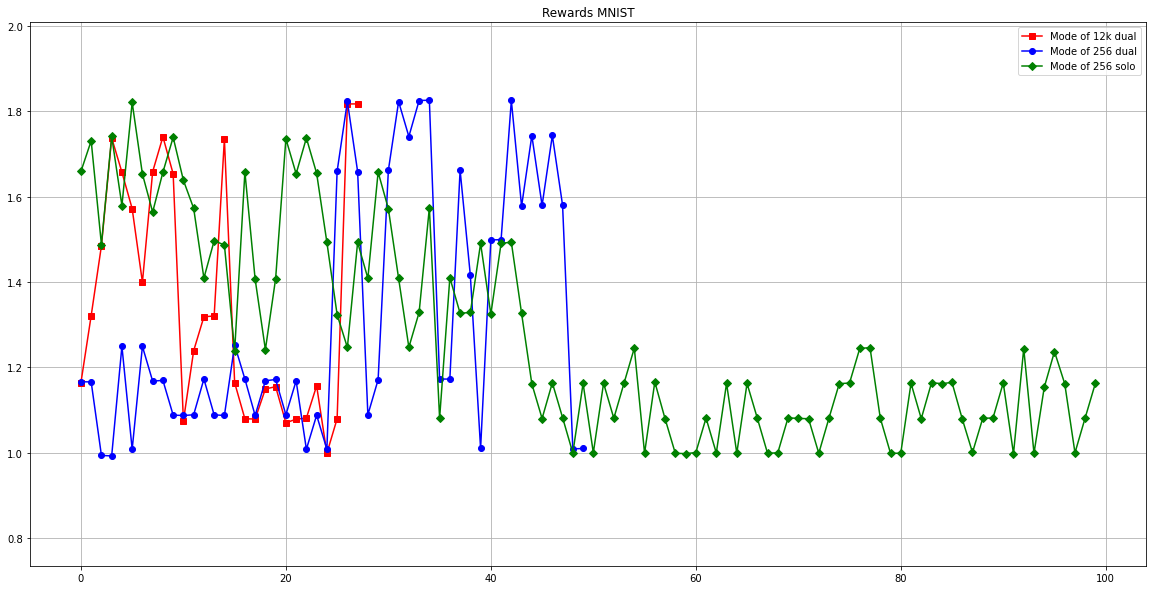

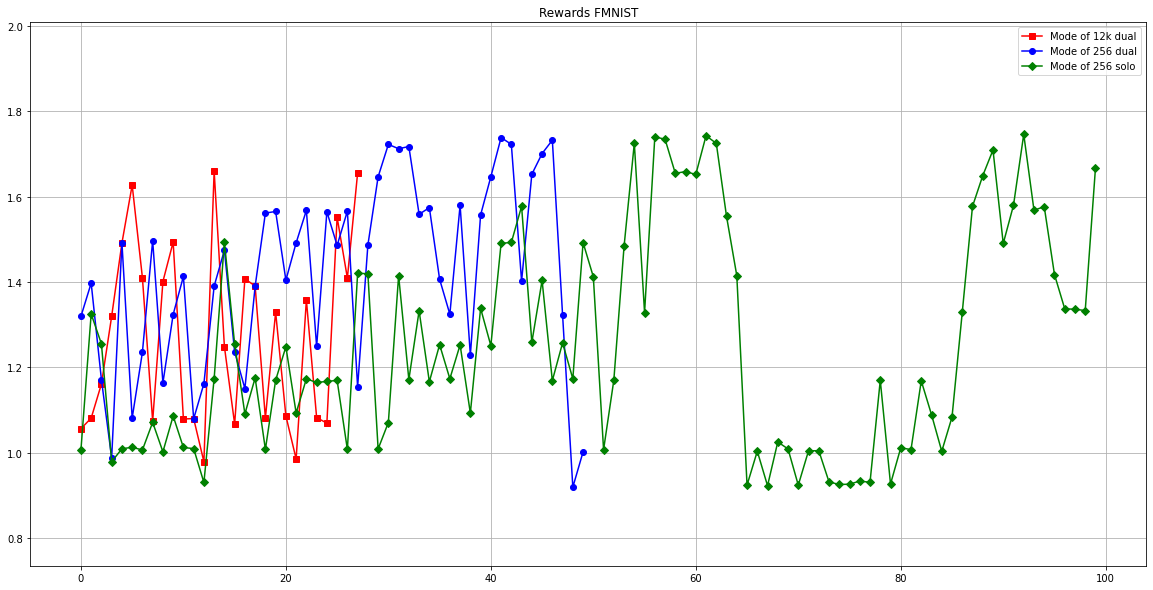

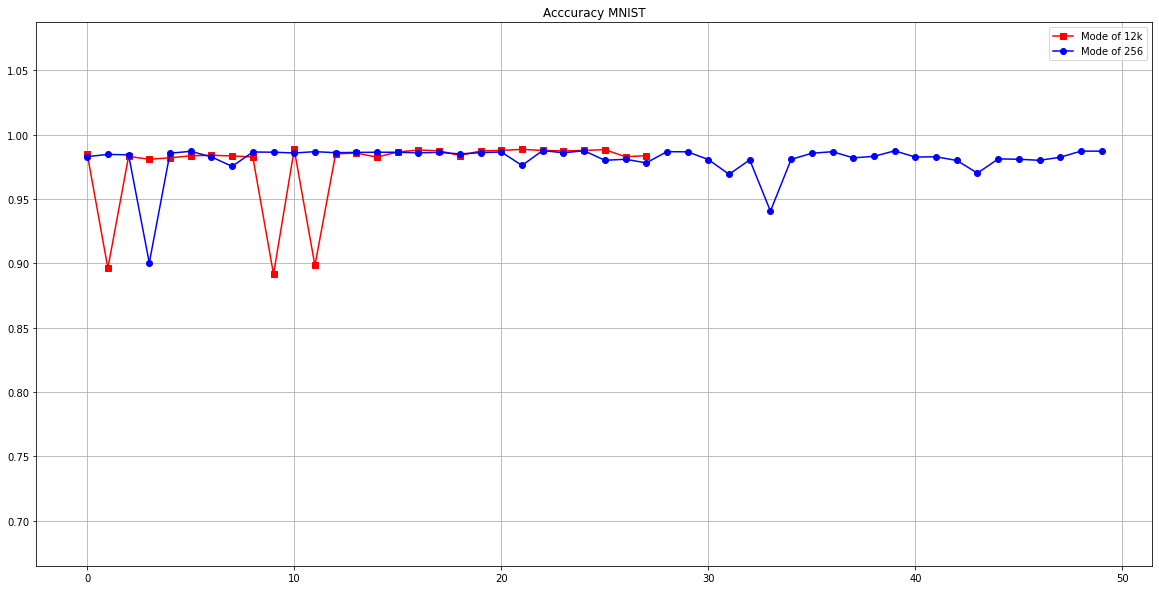

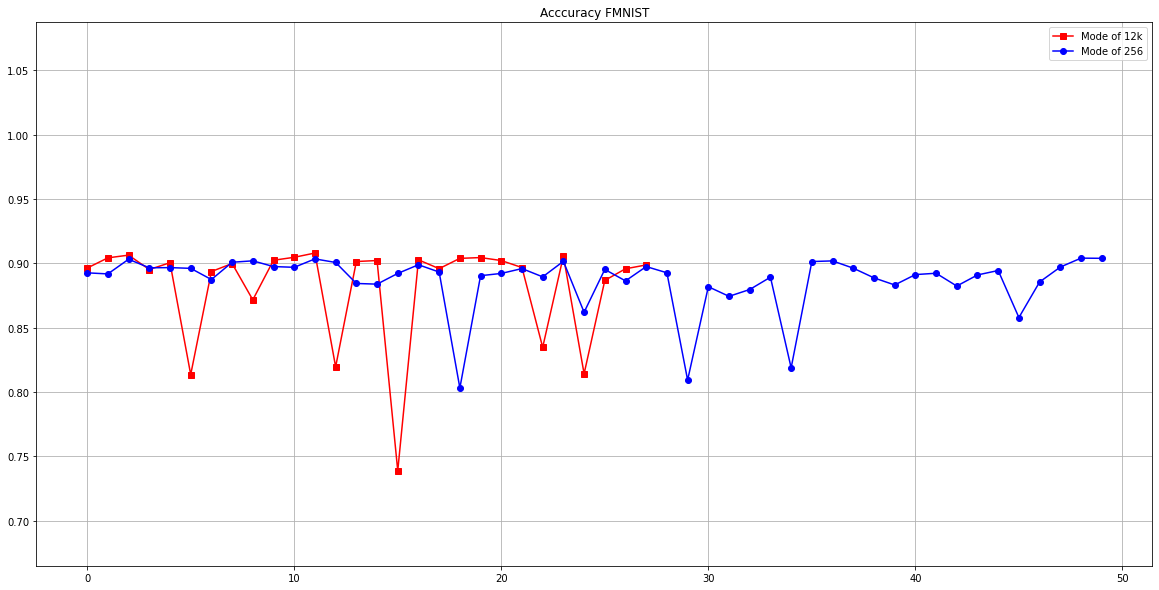

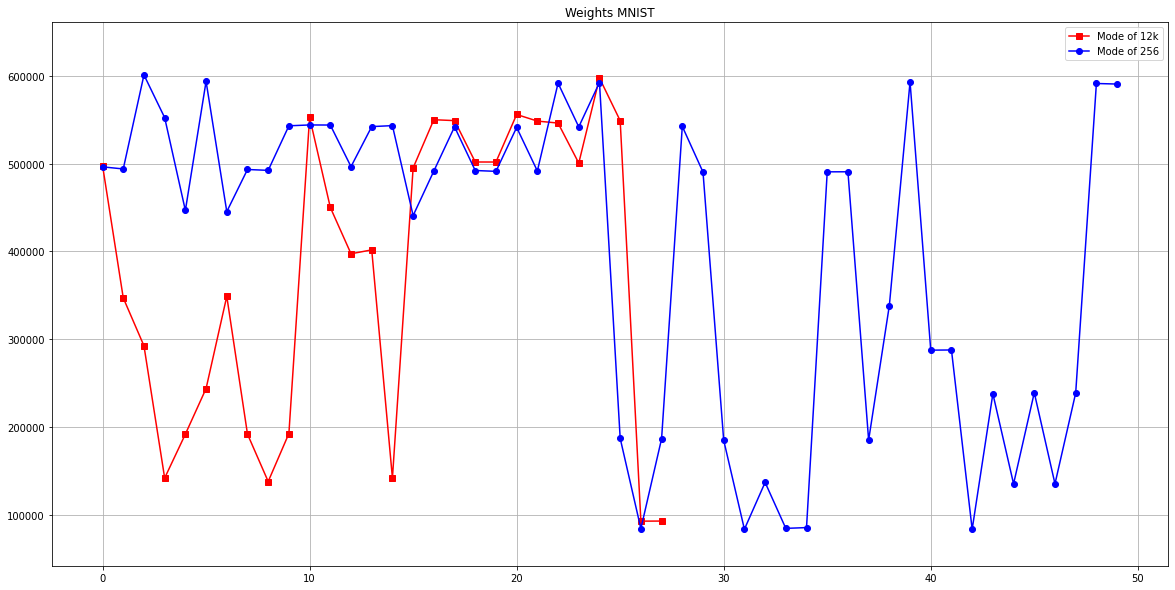

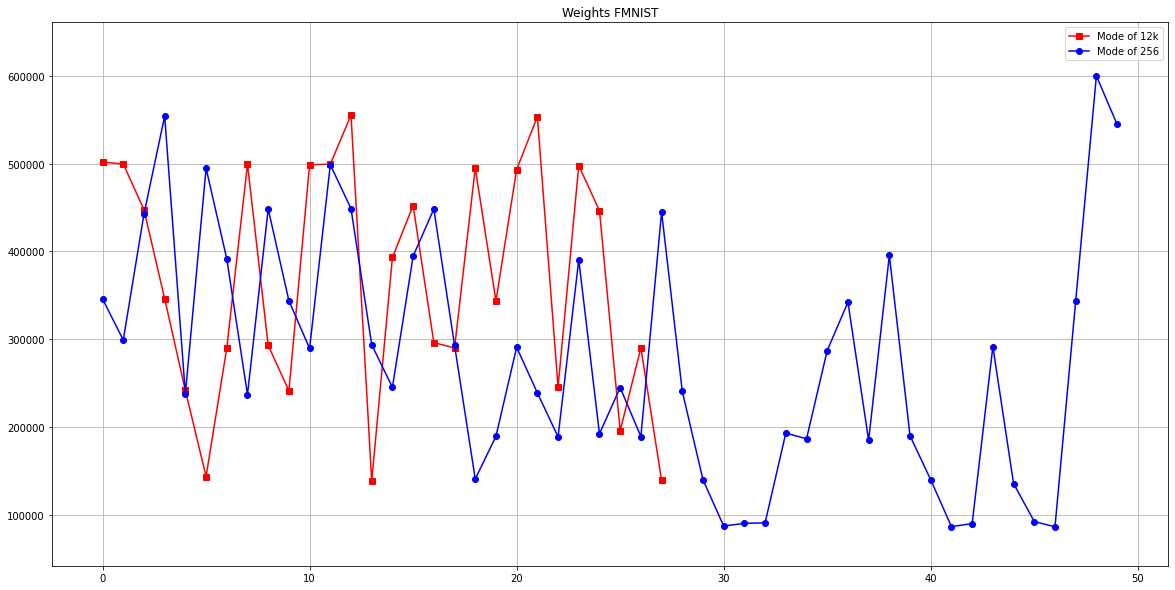

In [ ]:
weights256 = np.load('./data/numpy results/fashion_mnist_2022-05-20-17-2054-3990db70-7c26-44b8-91bb-ea1286161fc8_weights_history_10_mode_256.npy')
acc256 =  np.load('./data/numpy results/fashion_mnist_2022-05-20-17-2054-3990db70-7c26-44b8-91bb-ea1286161fc8_acc_history_10_mode_256.npy')
rewards256 =  np.load('./data/numpy results/fashion_mnist_2022-05-20-17-2054-3990db70-7c26-44b8-91bb-ea1286161fc8_rw_history_10_mode_256.npy')
weights12 = np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_weights_history_10_mode_12000.npy')
acc12 =  np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_acc_history_10_mode_12000.npy')
rewards12 =  np.load('./data/numpy results/fashion_mnist_2022-06-02-09-0809-aec2d9a5-157b-4047-8d1e-5a5922ca3002_rw_history_10_mode_12000.npy')

weights_solo_fmnist = np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_weights_history_10_mode_256.npy')
acc_solo_fmnist =  np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_acc_history_10_mode_256.npy')
rewards_solo_fmnist =  np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_rw_history_10_mode_256.npy')
td_conv_loss_solo_fmnist = np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_td_loss_conv_10_mode_256.npy')
td_fc_loss_solo_fmnist = np.load('./data/numpy results/fashion_mnist_2022-06-10-18-4119-7951618e-3a5d-4266-b79f-56136ecb5f1b_td_loss_fc_10_mode_256.npy')

weights_solo_mnist = np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_weights_history_10_mode_256.npy')
acc_solo_mnist =  np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_acc_history_10_mode_256.npy')
rewards_solo_mnist =  np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_rw_history_10_mode_256.npy')
td_conv_loss_solo_mnist = np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_td_loss_conv_10_mode_256.npy')
td_fc_loss_solo_mnist = np.load('./data/numpy results/mnist_2022-06-08-16-3451-ba586b8b-5f1e-4c17-b32d-6eb7a65d97a5_td_loss_fc_10_mode_256.npy')


rewards_mnist12 = rewards12[0::2]
rewards_fmnist12 = rewards12[1::2]
rewards_mnist256 = rewards256[0::2]
rewards_fmnist256 = rewards256[1::2]


min_y = np.min(np.concatenate([rewards12, rewards256])) * 0.8
max_y = np.max(np.concatenate([rewards12, rewards256])) * 1.1
plt.figure(figsize=(20,10))
plt.title('Rewards MNIST')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards_mnist12, c='r', marker='s')
plt.plot(rewards_mnist256, c='b', marker='o')
plt.plot(rewards_solo_mnist, c='g', marker='D')
plt.legend(['Mode of 12k dual', 'Mode of 256 dual', 'Mode of 256 solo'])
plt.show()

plt.figure(figsize=(20,10))
plt.title('Rewards FMNIST')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(rewards_fmnist12, c='r', marker='s')
plt.plot(rewards_fmnist256, c='b', marker='o')
plt.plot(rewards_solo_fmnist, c='g', marker='D')
plt.legend(['Mode of 12k dual', 'Mode of 256 dual', 'Mode of 256 solo'])
plt.show()

acc_mnist12 = acc12[0::2]
acc_fmnist12 = acc12[1::2]
acc_mnist256 = acc256[0::2]
acc_fmnist256 = acc256[1::2]

min_y = np.min(np.concatenate([acc12, acc256])) * 0.9
max_y = np.max(np.concatenate([acc12, acc256])) * 1.1
plt.figure(figsize=(20,10))
plt.title('Acccuracy MNIST')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(acc_mnist12, c='r', marker='s')
plt.plot(acc_mnist256, c='b', marker='o')
plt.legend(['Mode of 12k', 'Mode of 256'])
plt.show()

plt.figure(figsize=(20,10))
plt.title('Acccuracy FMNIST')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(acc_fmnist12, c='r', marker='s')
plt.plot(acc_fmnist256, c='b', marker='o')
plt.legend(['Mode of 12k', 'Mode of 256'])
plt.show()

w_mnist12 = weights12[0::2]
w_fmnist12 = weights12[1::2]
w_mnist256 = weights256[0::2]
w_fmnist256 = weights256[1::2]

min_y = np.min(np.concatenate([weights12, weights256])) * 0.5
max_y = np.max(np.concatenate([weights12, weights256])) * 1.1
plt.figure(figsize=(20,10))
plt.title('Weights MNIST')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(w_mnist12, c='r', marker='s')
plt.plot(w_mnist256, c='b', marker='o')
plt.legend(['Mode of 12k', 'Mode of 256'])
plt.show()

plt.figure(figsize=(20,10))
plt.title('Weights FMNIST')
plt.grid()
plt.ylim(min_y, max_y)
plt.plot(w_fmnist12, c='r', marker='s')
plt.plot(w_fmnist256, c='b', marker='o')
plt.legend(['Mode of 12k', 'Mode of 256'])
plt.show()

In [ ]:
mnist256 = np.argmax(rewards_mnist256)
fmnist256 = np.argmax(rewards_mnist256)
mnist12 = np.argmax(rewards_mnist12)
fmnist12 = np.argmax(rewards_fmnist12)

print('256')
print('mnist:', rewards_mnist256[mnist256],'acc:', acc_mnist256[mnist256] ,'w:', w_mnist256[mnist256], 100*w_mnist256[mnist256]/617322 )
print('fmnist:', rewards_fmnist256[fmnist256],'acc:', acc_fmnist256[fmnist256] ,'w:', w_fmnist256[fmnist256], 100*w_fmnist256[fmnist256]/617322 )

print('12k')
print('mnist:', rewards_mnist12[mnist12],'acc:', acc_mnist12[mnist12] ,'w:', w_mnist12[mnist12], 100*w_mnist12[mnist12]/617322 )
print('fmnist:', rewards_fmnist12[fmnist12],'acc:', acc_fmnist12[fmnist12] ,'w:', w_fmnist12[fmnist12], 100*w_fmnist12[fmnist12]/617322 )


256
mnist: 1.825569756691594 acc: 0.9808999955654144 w: 85094.5 13.78445932592715
fmnist: 1.5741582361804223 acc: 0.818790004402399 w: 186293.3 30.17765444937974
12k
mnist: 1.816954299635017 acc: 0.983760005235672 w: 92536.4 14.989972818075493
fmnist: 1.6599157053388551 acc: 0.9014699995517731 w: 138167.2 22.38170679159337
